In [22]:
# Initial settings

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import loading
import creating_table
import analyzing
import modeling
import validating

# URLs with correct format: raw from GitHub
url_energy = "https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv"
url_country = "https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv"

energy = loading.load_data(url_energy)
country = loading.load_data(url_country)

main_df = creating_table.main_table(energy_df = energy, country_df = country)

## Introduction

Energy is seen as a key driver of wealth creation and an important component of economic growth. Everyone agrees that energy plays a crucial role in economic growth, and historical evidence shows that there is a direct correlation between energy availability and economic activity. Global energy consumption and demand have been increasing steadily over the past few decades. The need for commercial services, such as hospitals, schools, office buildings, and retail malls, as well as for household appliances and electronic gadgets, is growing as living standards rise1. As seen, alongside the growth of industry and population, electricity consumption has been rising daily. Because of this circumstance, scholars are now looking at the connection between energy and the economy. The form of the relationship has been empirically tested by studies using different approaches, with some studies focusing on the analysis of a single nation and others looking at groups of nations.

On the other hand, the economic literature has extensively studied also the relationship between environmental impacts and economic growth. There is some debate about the nature of the relationship between GDP per capita and greenhouse gas emissions in the context of climate change. As found in the literature, on average, there is still a positive correlation between GDP per capita and CO2 emissions per capita. Nonetheless, there is a global trend toward this link becoming weaker. However, worldwide decoupling of economic growth and CO2 has not yet been accomplished. One mechanism for diminishing the CO2 emissions is by transitioning the energy generation to renewals or low-carbon intensity sources. This rationale adheres to the concept of sustainable development, which guarantees that resource preservation and energy substitution will not result in a decline in per capita net national wealth. Indeed, economic development can progress if it can be guaranteed that the ecosystem will continue to function in a sustainable manner.

This study aims to examinate the relationship between GDP per capita and electricity generation by type of source: fossil fuels and low-carbon sources, across a comprehensive set of 164 countries over different time periods, with a focus on the 2000–2022 period. The countries included in the sample accounted for 96.6% of the total world population in 2021, representing 7,717 million people, with some countries discarded from the sample due to data limitations.

In [24]:
total_countries = len(main_df["country"].unique())
sample_population = round(main_df[main_df["year"] == 2022]["population"].sum(),2)
total_population_2022 = 7986309000 #Source from https://www.statista.com/statistics/805044/total-population-worldwide/
perc_sample_population = round((sample_population / total_population_2022), 3)

summary_table = pd.DataFrame({
    "Total Countries": [total_countries],
    "Sample Population": [sample_population],
    "Percentage Sample Population": [perc_sample_population]
})

summary_table

,Total Countries,Sample Population,Percentage Sample Population
0,164,7.717386e+09,0.966


## Data Exploration and Preparation

The database used for the energy dimensions was taken from the Our World in Data website. It provides information on electricity production and demand by type of source, distinguishing between fossil fuels, renewables and nuclear, from 1900 to 2023. It also provides data on greenhouse gas emissions and carbon intensity, as well as country, year, population and GDP. Fifteen variables were selected from the 129 available. The list of countries was retrieved from the World Bank data repository to include the region per country. Finally, an exploratory analysis of the database shows the availability of our variables of interest from 2000 to 2022 for the majority of countries, defining the period to be analysed. This analysis includes 49 countries from Africa, 28 from the Americas, 45 from Asia, 39 from Europe and 2 from Oceania.

In [25]:
countries_per_region = pd.DataFrame(columns=["Region", "Countries"])

countries_count = main_df.groupby("region")["country"].nunique().reset_index()
countries_count.columns = ["Region", "Countries"]

countries_per_region = pd.concat([countries_per_region, countries_count], ignore_index=True)
countries_per_region

/var/folders/0f/hg1ncsnx2jn_vdpcdlx5j1f40000gn/T/ipykernel_26760/1837636302.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  countries_count = main_df.groupby("region")["country"].nunique().reset_index()
/var/folders/0f/hg1ncsnx2jn_vdpcdlx5j1f40000gn/T/ipykernel_26760/1837636302.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  countries_per_region = pd.concat([countries_per_region, countries_count], ignore_index=True)


,Region,Countries
0,Africa,49
1,Americas,28
2,Asia,45
3,Europe,39
4,Oceania,2


As shown in the table below, GDP per capita rises from USD 438.61 to USD 164,146.4. In addition, as expected from the literature and economic indicators, electricity generation is dominated by fossil fuels rather than low-carbon sources such as nuclear or renewables. This can be seen from the average, where the average electricity generation per person is 2,274 KWh from fossil fuels compared to 1,341 KWh from low-carbon sources. However, the maximum value for low-carbon sources (31,641 KWh) is almost one quarter times the maximum value for fossil fuel electricity generation per person (24,133 KWh). Nevertheless, the first value could be considered more variable, with a standard deviation of 3,322.

In [26]:
describe_table = analyzing.describe(main_df)
describe_table

/Users/laurab_g/Documents/PSE_PYTHON_FINAL PROJECT/PYTHON_FINAL_PROJECT/PYTHON_FINAL_PROJECT/analyzing.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  descriptive_table = pd.concat([descriptive_table, new_data], ignore_index=True)


,Variable,Unit,Min,Max,Mean,Median,SD
0,gdp_per_capita,USD - 2011 prices,438.61,164146.40,16622.62,10364.42,18071.49
1,fossil_elec,kilowatt-hours per person,0.08,24133.34,2274.94,1092.88,3322.34
2,lowcarbon_elec,kilowatt-hours per person,0.00,31641.85,1341.40,247.04,3122.88


Regarding the distributions of our variables of interest, it can be seen that they are positively skewed, with an exponential growth in the lower levels. Therefore, one could assume that transformations should be carried out to normalize the distributions, as one of the assumptions to be met when running econometric models to simplify the results.

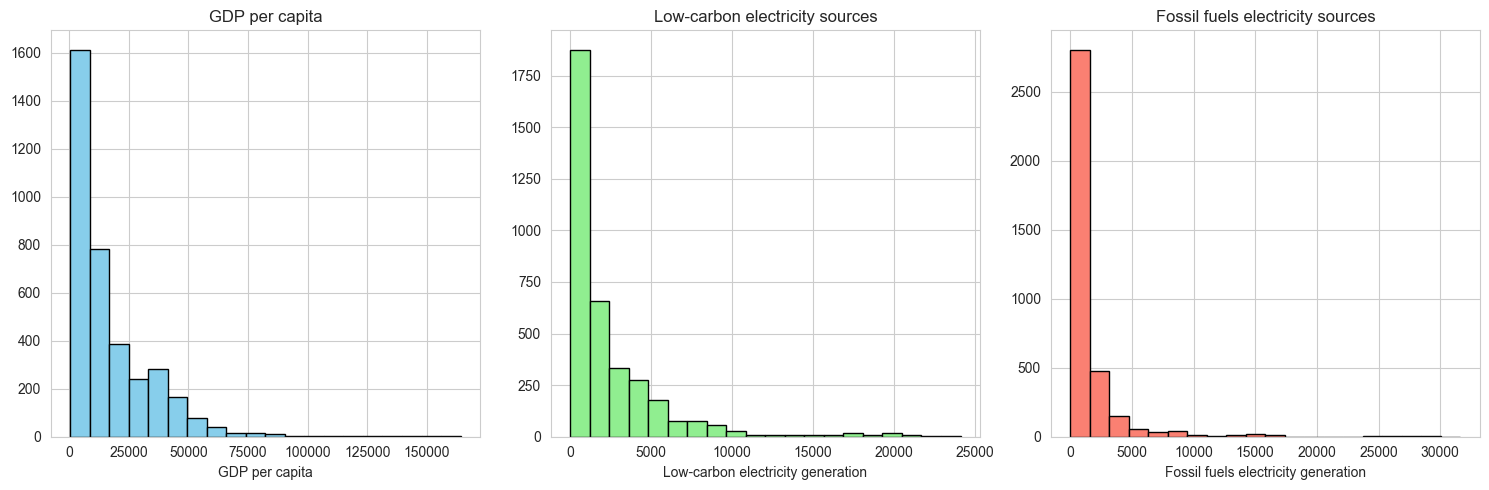

In [27]:
analyzing.plot_histograms(main_df)

As mentioned above, a positive relationship between electricity and GDP is expected. After transforming our variables of interest into their log() versions, we see a positive correlation in both cases (from fossil fuels and low-carbon sources), as shown in the scatterplots below, although the relationship seems clearer for fossil fuels generation. Moreover, the degree of correlation also seems to be regionally related, with European countries more represented in the higher values and African countries in the lower ones. Another notable feature of the scatter plots is the degree of dispersion between fossil fuels and low-carbon sources. This suggests that more developed countries have made progress in the energy transition without negatively affecting their economic growth, while developing countries are still heavily dependent on traditional energy sources.

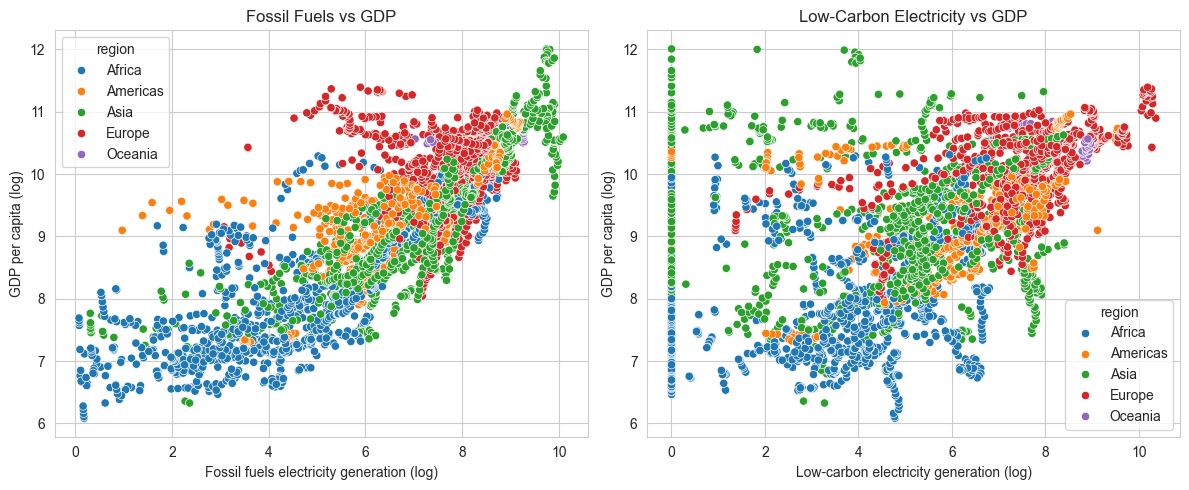

In [28]:
analyzing.plot_scatterplots(main_df)

Finally, the correlation matrix gives us further evidence of the relationship between our variables of interest. The variable per_capita_electricity, which represents the total electricity production per person, is highly correlated with gdp_per_capita, as expected. Moreover, the correlation between per_capita_electricity and fossil_elec is stronger than that between lowcarbon_elec, both being significant at 1%. Furthermore, in terms of our dependent variable, GDP per capita, the correlation between fossil fuels is higher than for low-carbon electricity, both being significant at 1%. The correlation between our independent variables is also lower and not significant. This may indicate that there are no multicollinearity problems within the independent variables.

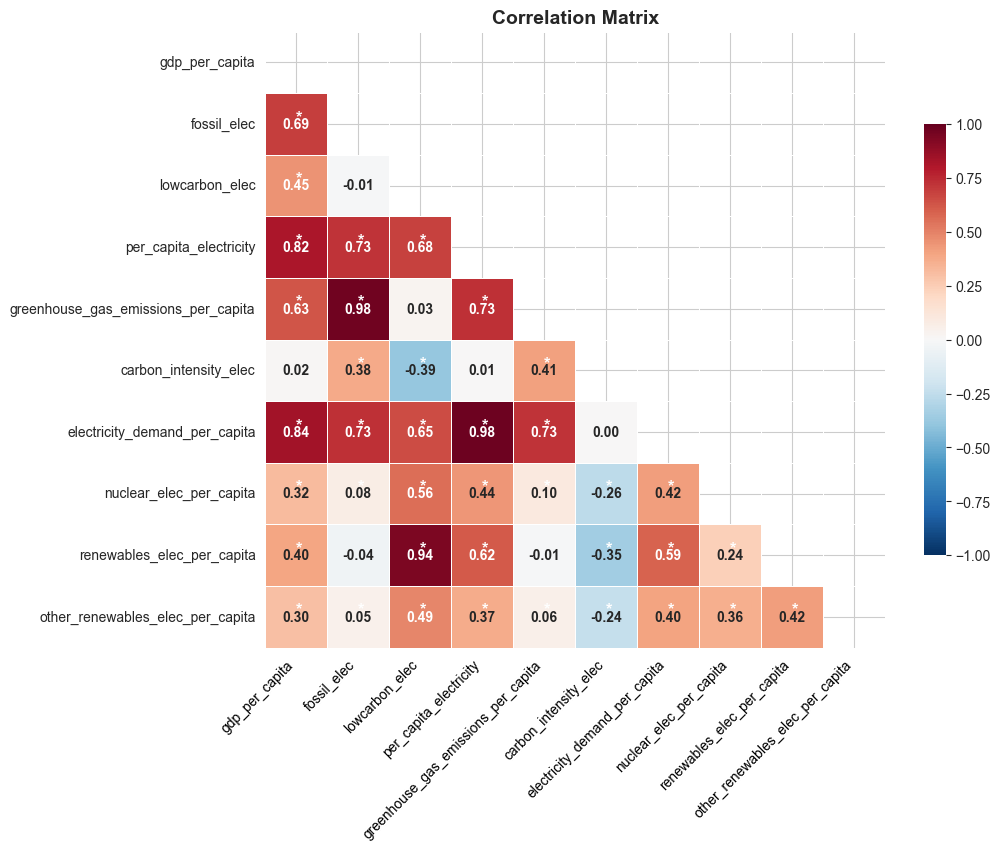

In [29]:
analyzing.correlation_matrix(main_df)

## Regression Model Specification

The aim of this analysis is to examine how the transition to low-carbon sources of electricity generation may affect the growth of GDP per capita. The transition to cleaner sources helps to reduce the impact on the environment, which is a relevant concern in current political and social debates. However, the growth of the economy is just as important as the environmental debate, as this factor is relevant to other conditions such as the level of investment, consumption and development.

As this is a panel data set, three models are run to identify the more precise and statistically significant one. The first model will be run as an pooled OLS model and the other two will evaluate fixed effects components on country and year. One of the advantages when using panel data is the possibility to control for unobservable heterogenity by using fixed effects, which may increase the efficiency of the coefficients by cleaning as much as possible the $`cov(x_{it}|u_{it})$.

The general specification of the panel regression model is as follows:

$log(GDPpercapita)_{it} = \beta_0 + \beta_1 *log(fossilfuelelectricity)_{it} + \beta_2*log(lowcarbonelectricity)_{it} + v_i + \gamma_t + u_{it}$

where:

+ $𝑖$ stands for the country indicator (cross section)

+ $t$ is the time indicator express in years

+ $\beta_0$ is the intercept, $\beta_1$ the elasticity of electricity from fossil fuels and $\beta_2$ the elasticity from low-carbon sources

+ $v_i$ are unobserve characteristics that change over individuals

+ $\gamma_t$ are unobserve characteristics that change over years

+ $u_{it}$ is the stochastic error term of the model

In some cases, there are no unobservable country-specific effects, and $v_i$ and $\gamma_t$ are constant across countries and years. However, this is a strong assumption and implies that all the observations within groups are independent of one another.

In these cases, the model becomes as follows:

$log(GDPpercapita)_{it} = \beta_0 + \beta_1 *log(fossilfuelelectricity)_{it} + \beta_2*log(lowcarbonelectricity)_{it} + u_{it}$

This implies that when there is no dependence within individual groups, and the panel data can be treated as one large, pooled dataset. The model parameters, $\beta_0$, $\beta_1$ and, $\beta_2$ can be directly estimated using pooled ordinary least squares. Nevertheless, linear independence within the groups of a panel is unlikely and pooled OLS is rarely acceptable for panel data models.

## Results

The results of the models analysed are presented below. As can be seen, the impact of electricity generated from fossil fuels and low carbon sources on GDP per capita growth is positive and significant at 1% in all models. Comparing the models, it can be concluded that the coefficients for fossil fuels are larger than for low carbon sources, showing a greater elasticity for fossil fuels than for low carbon sources. Therefore, we can conclude that a 1% increase in electricity generated from fossil fuels leads to a 1.05% increase in GDP per capita (OLS model), or between 0.13% to 0.43% (depending on the fixed effects controls) . On the other hand, a 1% increase in electricity generated from low-carbon sources has a 0.27% impact on GDP per capita (OLS model), or between 0.08% to 0.12% under fixed effects. One conclusion that can be drawn when running the model with country fixed effects, is that the difference on the elasticities are not very large (5 pp). When comparing the results between fixed effects and OLS, it can be seen that the largest difference is found with the Pooled OLS model, which may give us insights on the existence of ommited variables. From these results, we can conclude that electricity has a positive effect on GDP per capita growth, with a lower relevance of the sources from which it is produced.

A fourth model was analysed using two-way fixed effects, controlling for country and year. However, the $R^2$ and the coefficients decreased even more than in the country fixed effects model. In addition, the coefficient for low carbon is no longer significant.

In [30]:
modeling.regression_models(main_df)


Regression Results - Pooled vs Fixed Effects models
                               Pooled OLS             FE Country  \
log_lowcarbon_elec  0.3745 (0.0104) [***]  0.0854 (0.0043) [***]   
log_fossil_elec     1.0462 (0.0089) [***]  0.1392 (0.0073) [***]   

                                  FE Year  
log_lowcarbon_elec   0.1222 (0.004) [***]  
log_fossil_elec     0.4313 (0.0049) [***]  


/Users/laurab_g/Documents/PSE_PYTHON_FINAL PROJECT/PYTHON_FINAL_PROJECT/PYTHON_FINAL_PROJECT/sia_master/lib/python3.9/site-packages/linearmodels/panel/data.py:680: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mu = self._frame.groupby(level=level).mean()
/Users/laurab_g/Documents/PSE_PYTHON_FINAL PROJECT/PYTHON_FINAL_PROJECT/PYTHON_FINAL_PROJECT/sia_master/lib/python3.9/site-packages/linearmodels/panel/data.py:680: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mu = self._frame.groupby(level=level).mean()
/Users/laurab_g/Documents/PSE_PYTHON_FINAL PROJECT/PYTHON_FINAL_PROJECT/PYTHON_FINAL_PROJECT/sia_master/li

## Discussion of the Zero Conditional Mean Assumption

The aim of the analysis is to identify the impact of switching to low-carbon sources of electricity generation on GDP growth. As seen in the previous section, the models support the relationship between electricity and GDP, but it is still unclear how economies might change by using cleaner energy sources to generate electricity.

As seen before, controlling for country or time fixed effects drastically reduces the coefficients. This scenario provides evidence of omitted variables that may be related to the impact of the type of electricity generation sources. Furthermore, as can be seen in the graphs below, we can assume that for the model proposed, $cov(x_{it}|u_{it})\neq 0$. This implies that the residuals are correlated with the independent variables, leading to inconsistent and inefficient estimators. This suggests that the data may have more extreme values than expected from a perfect normal distribution, indicating potential outliers or deviations from normality at the extremes. This inconveniences can also led to biased estimates or inaccurate p-values.

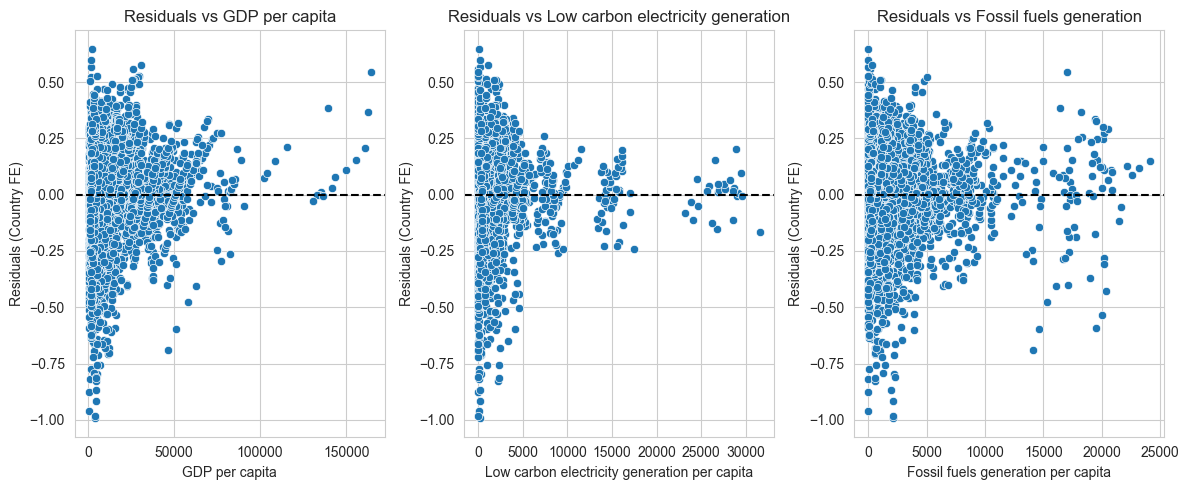

In [32]:
validating.residuals(main_df)

To improve the estimation, we would need to include additional explanatory variables that help to isolate the effect of cleaner energy production on the development of the economy. Some variables that may be available are the level of investment in renewable energy infrastructure per country, energy regulation and policy per country, interest rate per country to control for the level of investment in infrastructure and technology, electricity price per KWh, among others.

## Conclusion

This study follows the conclusions of the literature on the positive relationship between GDP growth and electricity generation. Further analysis has been carried out to analyse the effect of transitioning to cleaner sources of electricity generation on economic growth. The results found show a positive relationship between the use of low carbon sources, such as nuclear or renewable resources, and GDP. However, further analysis needs to be done to consider this relationship correctly. The model analysed presents limitations in the estimators due to the existence of omitted variables that can bias the magnitude found for the use of low carbon sources over the GDP per capita growth.  When working with a panel database, OLS estimators are rarely unbiased due to the presence of observable variables over individuals and over time that are omitted. Indeed, by using time-effects and country-effects the coefficients decreased gradually, leading to conclude that unobservable variables are being considered. However, as mentioned before, further analysis needs to be done to isolate more efficiently and accurately the effects. 
